<a href="https://colab.research.google.com/github/NileshCT/EDA_PROJECT/blob/main/EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploratory data analysis in Python.**
#It tells how to perform EDA in python and also what we needed to do.
Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

#Problem statements
This dataset has around 66368 observations in it with 14 columns and it is a mix between categorical and numeric values. As per the initial observation the dataset consist of more catagorical data than numerical data.

#Explore and analyze the data to discover key understandings such as :
1.To know about the what are the insights in given dataset?
2.Which company getting the more funding and how much?
3.To explore which company getting more funding rounds and how much funding they got?
4.To explore which company catagory the leading in the market?
To get know the present status about the startups?
5.Which country leading in startups?











# **Importing required labraries**

In [2]:
#Below are the libraries that are used in order to perform EDA (Exploratory data analysis).
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import accuracy_score, classification_report
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

# **Loading the data into the data frame.**

Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.


In [3]:
#Import CSV file from google drive:
data=pd.read_csv("/content/drive/MyDrive/dataset.csv")


In [4]:
#Lets display the top 5 row from dataset to explore column names, indexes better:
data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [5]:
#Lets display last 5 rows from dataset to explore column names, indexes better:
data.tail()


,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01
66367,/organization/İnovatiff-reklam-ve-tanıtım-hizm...,İnovatiff Reklam ve Tanıtım Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,14851,operating,NaN,NaN,NaN,NaN,1,NaN,2013-10-01,2013-10-01


# **Checking the types of data.**

In [6]:
#Lets get the data type of each column of a dataframe:
#Data frame consist of only one int column and all other type consist of object type.
#The dataframe consist of more catagorical values it means the given dataset have more therotical information instade of numerical informations.
data.dtypes

permalink            object
name                 object
homepage_url         object
category_list        object
funding_total_usd    object
status               object
country_code         object
state_code           object
region               object
city                 object
funding_rounds        int64
founded_at           object
first_funding_at     object
last_funding_at      object
dtype: object

In [7]:
#Lets display non-null value from data frame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


In [8]:
#Lets understand the number of rows and column in dataset.
#Given dataset consist of 66368 rows and total 14 column.
data.shape

(66368, 14)

In [9]:
data['status'].unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [10]:
data['name'].unique()

array(['#fame', ':Qounter', '(THE) ONE of THEM,Inc.', ..., 'ÁERON',
       'Ôasys', 'İnovatiff Reklam ve Tanıtım Hizmetleri Tic'],
      dtype=object)

In [11]:
data['category_list'].unique()

array(['Media', 'Application Platforms|Real Time|Social Network Media',
       'Apps|Games|Mobile', ...,
       'Advertising|Mobile|Web Development|Wireless',
       'Consumer Electronics|Internet of Things|Telecommunications',
       'Consumer Goods|E-Commerce|Internet'], dtype=object)

In [12]:
data['country_code'].unique()

array(['IND', 'USA', nan, 'CHN', 'HKG', 'CAN', 'CHL', 'GBR', 'FRA', 'AUS',
       'DNK', 'ROM', 'AUT', 'KOR', 'NLD', 'SWE', 'JPN', 'RUS', 'SGP',
       'NOR', 'COL', 'ESP', 'BEL', 'IRL', 'ITA', 'ISR', 'NZL', 'CZE',
       'DEU', 'CHE', 'BRA', 'BGR', 'SVN', 'JOR', 'HUN', 'BWA', 'NGA',
       'FIN', 'TUR', 'IDN', 'ARE', 'CYP', 'POL', 'CRI', 'PRT', 'ARG',
       'TWN', 'KHM', 'THA', 'SVK', 'UKR', 'LTU', 'ISL', 'ZAF', 'MEX',
       'VEN', 'URY', 'MUS', 'KEN', 'PHL', 'MNE', 'VNM', 'GHA', 'PSE',
       'MYS', 'PER', 'EGY', 'PAN', 'LVA', 'GGY', 'ALB', 'UGA', 'HRV',
       'EST', 'LBN', 'GRC', 'PAK', 'NPL', 'LUX', 'SAU', 'IRN', 'GTM',
       'BAH', 'ARM', 'BGD', 'MDA', 'SRB', 'TUN', 'ZWE', 'BRB', 'NIC',
       'TAN', 'PRI', 'TTO', 'BHR', 'CMR', 'BLR', 'CYM', 'BRN', 'ECU',
       'SLV', 'MLT', 'ZMB', 'MKD', 'GIB', 'TGO', 'LAO', 'BMU', 'HND',
       'MCO', 'MMR', 'KAZ', 'QAT', 'DOM', 'MAR', 'LIE', 'GEO', 'MOZ',
       'DZA', 'JAM', 'KNA', 'AZE', 'SEN', 'RWA', 'DMA', 'UZB', 'BLZ',
       'OMN', '

In [13]:
data['state_code'].unique()

array(['16', 'DE', nan, '22', 'IL', 'BC', 'CA', '12', 'NC', 'FL', 'NJ',
       'NY', 'MD', 'H9', 'OR', 'WA', '25', 'MA', 'A8', 'A9', '23', 'WI',
       'ON', 'OH', '2', 'AL', '21', 'TX', '7', 'RI', '36', '9', 'C3',
       '13', '11', '26', 'TN', '30', '19', '4', 'VA', '48', '17', 'IA',
       '34', 'DC', 'NH', '53', 'LA', 'VT', 'GA', '20', '10', '5', '29',
       'IN', 'CO', 'E7', 'P2', '1', 'NV', '40', 'PA', '52', 'MI', '18',
       '6', 'A2', 'MN', 'SC', '42', 'B4', 'CT', '61', 'KY', 'UT', 'AZ',
       'AR', '32', 'K4', 'B8', 'A6', 'I9', 'NS', 'N5', 'G5', 'U8', 'H3',
       'G2', 'G7', '27', '3', '24', '71', '56', 'MT', 'B7', 'ID', '66',
       'ME', '78', '8', 'K2', 'KS', 'M3', 'L9', 'E1', 'QC', 'C5', 'J8',
       'OK', 'E4', 'F2', 'V6', 'Q4', 'H2', 'MO', 'E9', 'P6', 'V2', 'F8',
       '14', 'AB', 'J9', '65', 'A4', 'C9', 'HI', 'Q5', 'H8', 'A5', 'NL',
       'A7', 'I2', 'B9', '97', '60', '28', 'NE', 'J2', 'AK', '86', 'NM',
       'V8', 'G8', 'R3', 'F4', 'I7', 'Z1', '15', 'N3', 'N7', 

In [14]:
data['region'].unique()

array(['Mumbai', 'DE - Other', nan, ..., 'Gardanne', 'Cancun', 'Muenchen'],
      dtype=object)

In [15]:
data['city'].unique()

array(['Mumbai', 'Delaware City', nan, ..., 'Uberlândia', 'Zwolle',
       'Damansara New Village'], dtype=object)

In [16]:
data['funding_rounds'].unique()

array([ 1,  2,  4,  3,  9,  5,  6,  7,  8, 10, 11, 12, 15, 13, 14, 17, 18,
       16, 19])

In [17]:
data['founded_at'].unique()

array([nan, '2014-09-04', '2007-01-01', ..., '2006-06-24', '2005-06-21',
       '2006-10-27'], dtype=object)

In [18]:
#Lets get information about the unique valuses from each column of data frame.
data.nunique()

permalink            66368
name                 66102
homepage_url         61191
category_list        27296
funding_total_usd    18896
status                   4
country_code           137
state_code             311
region                1092
city                  5111
funding_rounds          19
founded_at            3978
first_funding_at      4817
last_funding_at       4518
dtype: int64

**Visualize the Unique counts**

Following code help to visualize the unique values present in the data. For this, we will be using the seaborn library. You have to call the sns.countlot() function and specify the variable to plot the count plot.

In [19]:
sns.set_theme(style="whitegrid")

In [20]:
#To understands the statistics of columns that have numeric data types:
#Here we got total number of counts,means value,max-min,std values as below. 
data.describe()

,funding_rounds
count,66368.000000
mean,1.732522
std,1.360251
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,19.000000


In [21]:
#Lets explore the information in datas frame.
data.describe(include='all')

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
count,66368,66367,61310,63220,66368,66368,59410,57821,58338,58340,66368.000000,51147,66344,66368
unique,66368,66102,61191,27296,18896,4,137,311,1092,5111,NaN,3978,4817,4518
top,/organization/-fame,Blink,http://www.askforoffer.com,Software,-,operating,USA,CA,SF Bay Area,San Francisco,NaN,2012-01-01,2014-01-01,2014-01-01
freq,1,4,5,3995,12785,53034,37601,12900,8804,3526,NaN,2730,565,483
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.732522,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.360251,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN


In [22]:
#Lets explore the total number of column and there name.
data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at'],
      dtype='object')

In [23]:
#It is exploring the total length of the name present in column.
len(data.name.unique())

66103

In [24]:
#Its giving information about the status ie.this is discribing that there are 4 such status present in column.
len(data.status.unique())

4

# **Data cleaning process.**




**[1] Dropping the duplicate rows:**

This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as homepage_url,permalink doesn't make any sense to me so I just dropped for this instance.

In [25]:
#here info is new variable taken for to display the new table after the dropping of irrelevant column.
info= data.drop(['permalink','homepage_url'], axis=1)


In [26]:
info.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,#fame,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,:Qounter,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,004 Technologies,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [27]:
#Lets count the number of rows after dropping the duplicates.
info.count()

name                 66367
category_list        63220
funding_total_usd    66368
status               66368
country_code         59410
state_code           57821
region               58338
city                 58340
funding_rounds       66368
founded_at           51147
first_funding_at     66344
last_funding_at      66368
dtype: int64

In [28]:
info.shape

(66368, 12)

**[2] Checking the duplicate rows:**

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set.

In [29]:
#Lets drop duplicate rows from the data frame and there are (1,12) duplicate rows in data frame.
duplicate_rows_info = info[info.duplicated()]
print("number of duplicate rows: ", duplicate_rows_info.shape)

number of duplicate rows:  (1, 12)


**[3] Checking total number of null values in column:**

In [30]:
#This are the result of the total null value present before replacing them.
#Lets explore the total null calues in the data frame.
print(info.isnull().sum())

name                     1
category_list         3148
funding_total_usd        0
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64


**[4] Replacing null values in data frame.**



In [31]:
#Here in this step I replace null values of country_code,region,founded_at with no code,no region,no date respectively.
info["country_code"].fillna("No code", inplace = True)
info["region"].fillna("No region ", inplace = True)
info["founded_at"].fillna("No date", inplace = True)
info["state_code"].fillna("No code ", inplace = True)
#Here in this step I replace null values in city column with no city. 
info["city"].fillna("No city ", inplace = True)
#Here in this step I replace null values in name column with no name. 
info["name"].fillna("No name", inplace = True)
#Here in this step I replace null values in category_list column with no category_list. 
info["category_list"].fillna("No category_list", inplace = True)
#Here in this step I replace first_funded_at date with no date name.
info["first_funding_at"].fillna("No first_funding_at ", inplace = True)
info.head()




,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,#fame,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,No date,2015-01-05,2015-01-05
1,:Qounter,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,3406878,operating,No code,No code,No region,No city,1,No date,2014-01-30,2014-01-30
3,0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,004 Technologies,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [32]:
#This are the result of the total null value present before replacing them.
#The above all replacement steps are complted and now there is such missing values are there in data frame.
print(info.isnull().sum())

name                 0
category_list        0
funding_total_usd    0
status               0
country_code         0
state_code           0
region               0
city                 0
funding_rounds       0
founded_at           0
first_funding_at     0
last_funding_at      0
dtype: int64


In [57]:
#Converting Funding _tota_usd Column into Float dataType:
info['funding_total_usd'].value_counts()

-                   12718
1000000              1144
100000                982
500000                974
2000000               818
                    ...  
117932.546667671        1
388005                  1
1594999                 1
10860000                1
14851                   1
Name: funding_total_usd, Length: 14865, dtype: int64

# **Detecting Outliers**

**[6] Data Cleansing Techniques To Get Rid Of Unwanted Data and Outliers.**

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, funding_total_usd,funding rounds Here in all the plots, you can find some points are outside the box they are none other than outliers



Outliers can be detected using **visualization, implementing mathematical formulas on the dataset, or using the statistical approach**. All of these are discussed below. 

# **1. Visualization**

This is one of the method to detect the outlies in dataset.
We can use 
**[1] boxplot**
**[2] scatterplot**
**[3] z-score**
**[4] IQR (Inter Quartile Range)**.

**[1] Boxplot**

It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles.

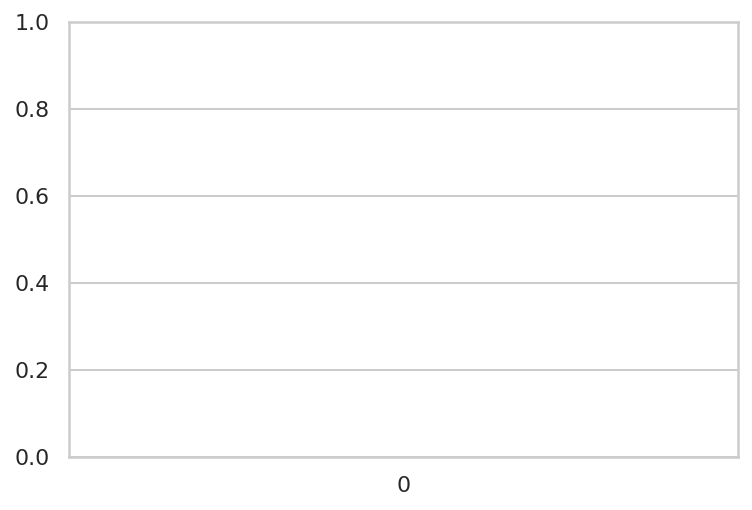

In [34]:
#In the below box plot the some points are outside the box they are none other than outliers.
sns.boxplot(row=info['funding_total_usd'])

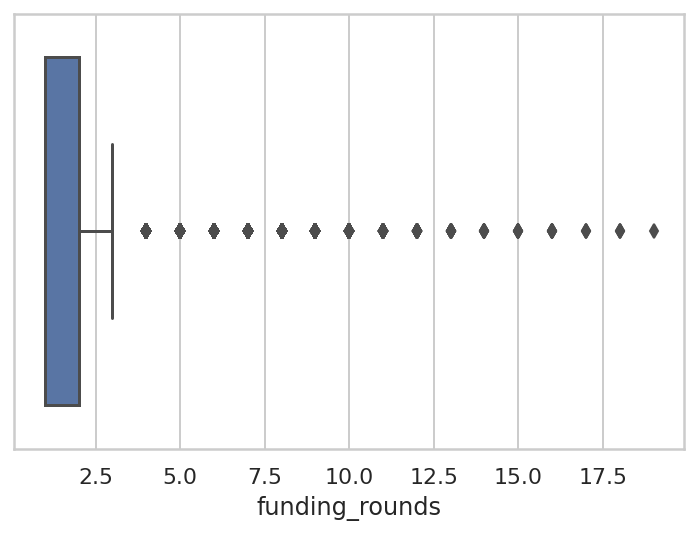

In [35]:
#Lets check outliers present the founding_round columns
sns.boxplot(x=info['funding_rounds'])

Here I plotted box of fundering_rounds and funding_total_used because in this two columns there is numerical values and all the other columns contains catagorical information so we cant find the outliers for them.

**[2] scatterplot**

**[7] Removing outliers from funding_rounds and funding_total_used:**

In [36]:
#for removing outlier we are using following method and that is represented as follow
Q1 = info.quantile(0.25)
Q3 = info.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


funding_rounds    1.0
dtype: float64


In [37]:
info = info[~((info < (Q1 - 1.5 * IQR)) |(info > (Q3 + 1.5 * IQR))).any(axis=1)]
info.shape

(60431, 12)

In [38]:
#Our 1st objective is to clean the data.
#since only the price column is in out control, we'll try detecting and tacling outliers from the column.
info.describe()

,funding_rounds
count,60431.000000
mean,1.389949
std,0.650715
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


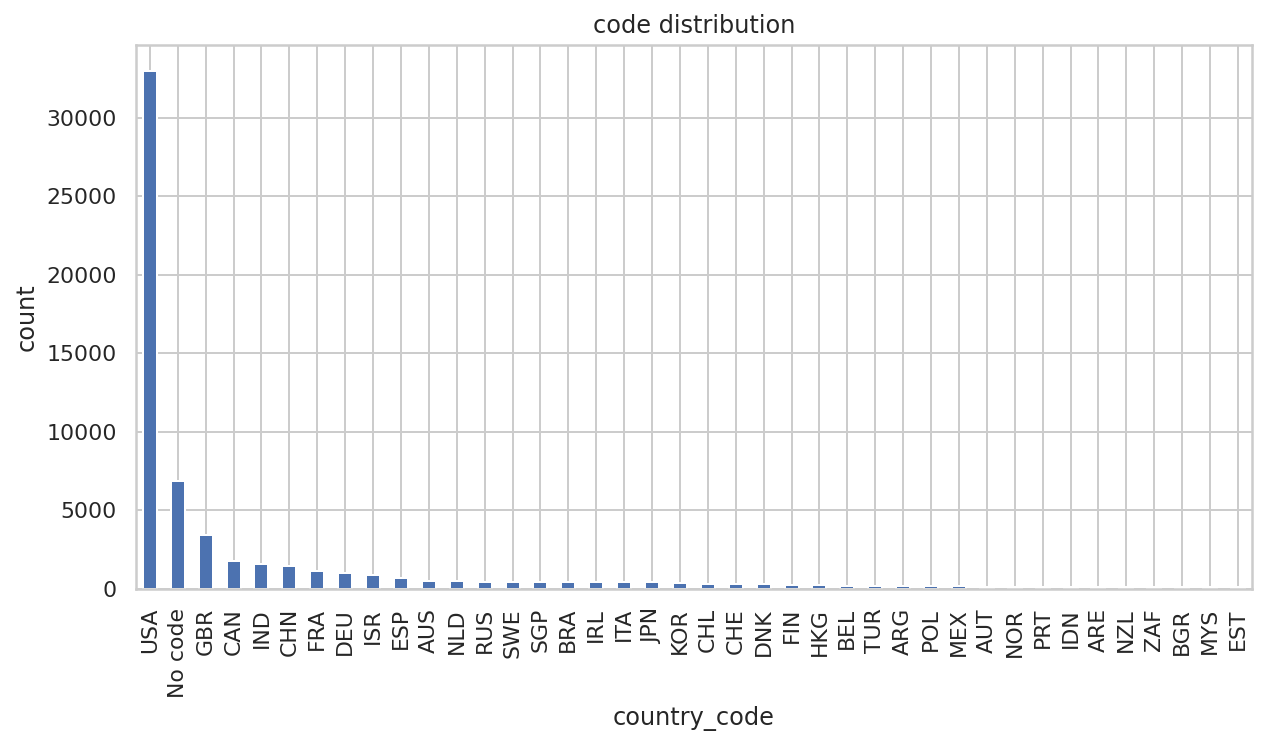

In [39]:
#Plot different features against one another (scatter), against frequency (histogram).
info.country_code.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("code distribution")
plt.ylabel('count')
plt.xlabel('country_code');

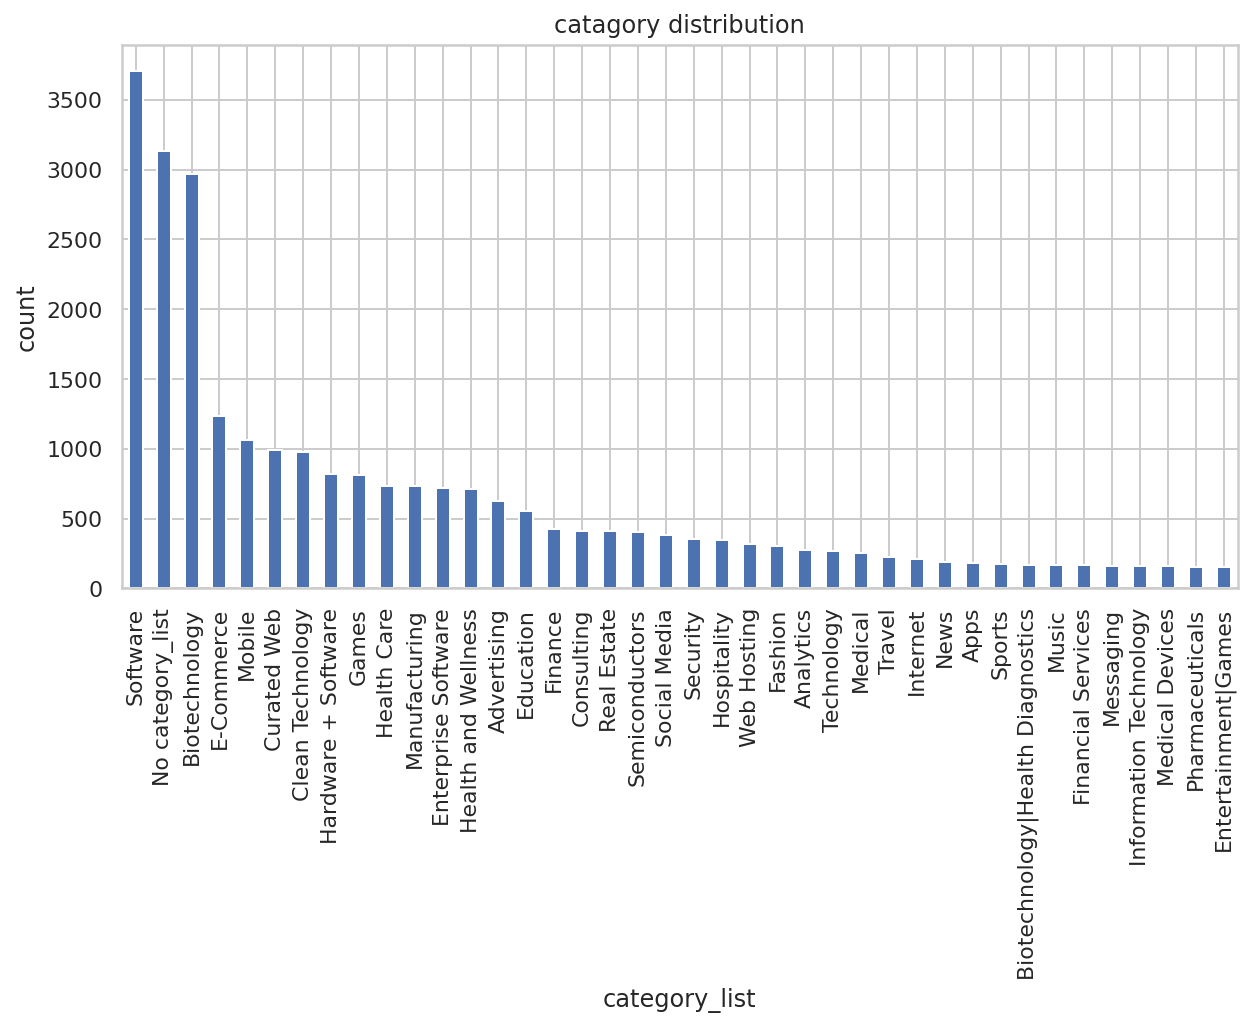

In [40]:
info.category_list.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("catagory distribution")
plt.ylabel('count')
plt.xlabel('category_list');

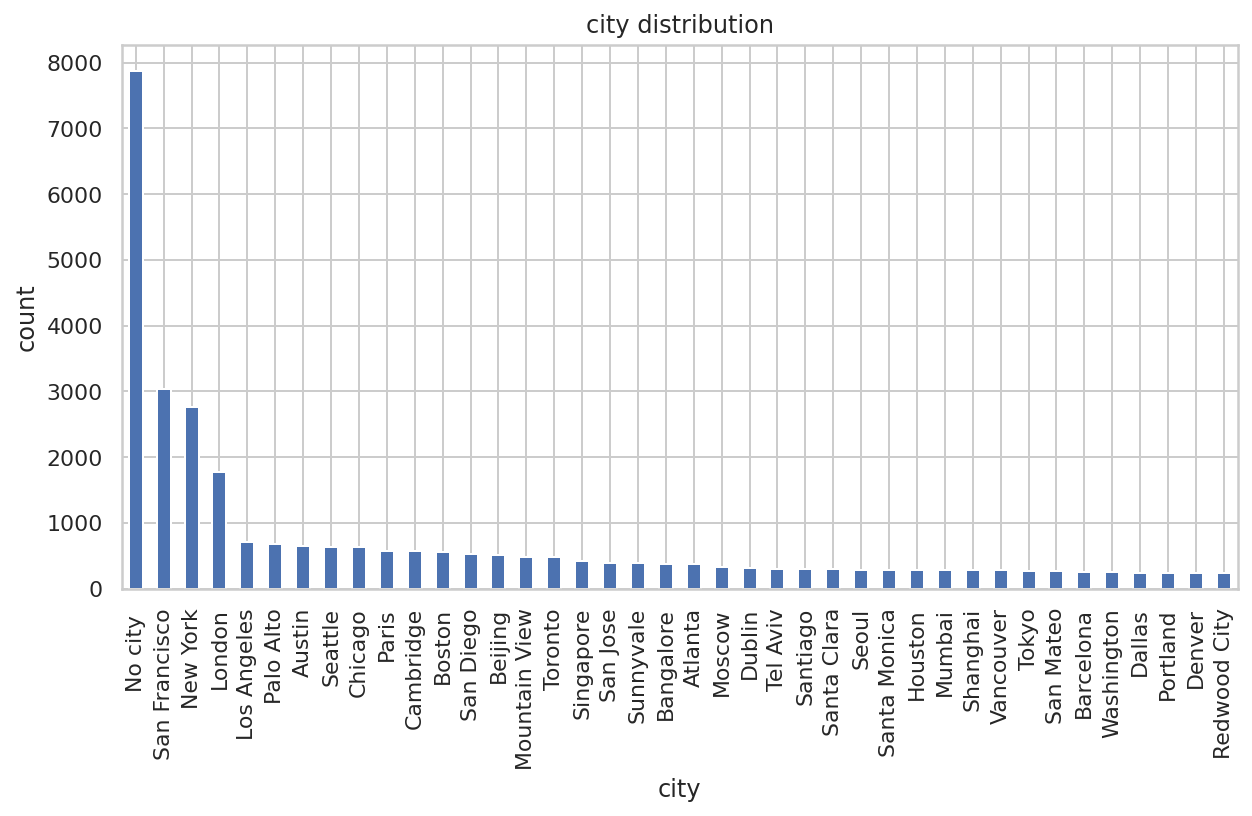

In [41]:
info.city.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("city distribution")
plt.ylabel('count')
plt.xlabel('city');

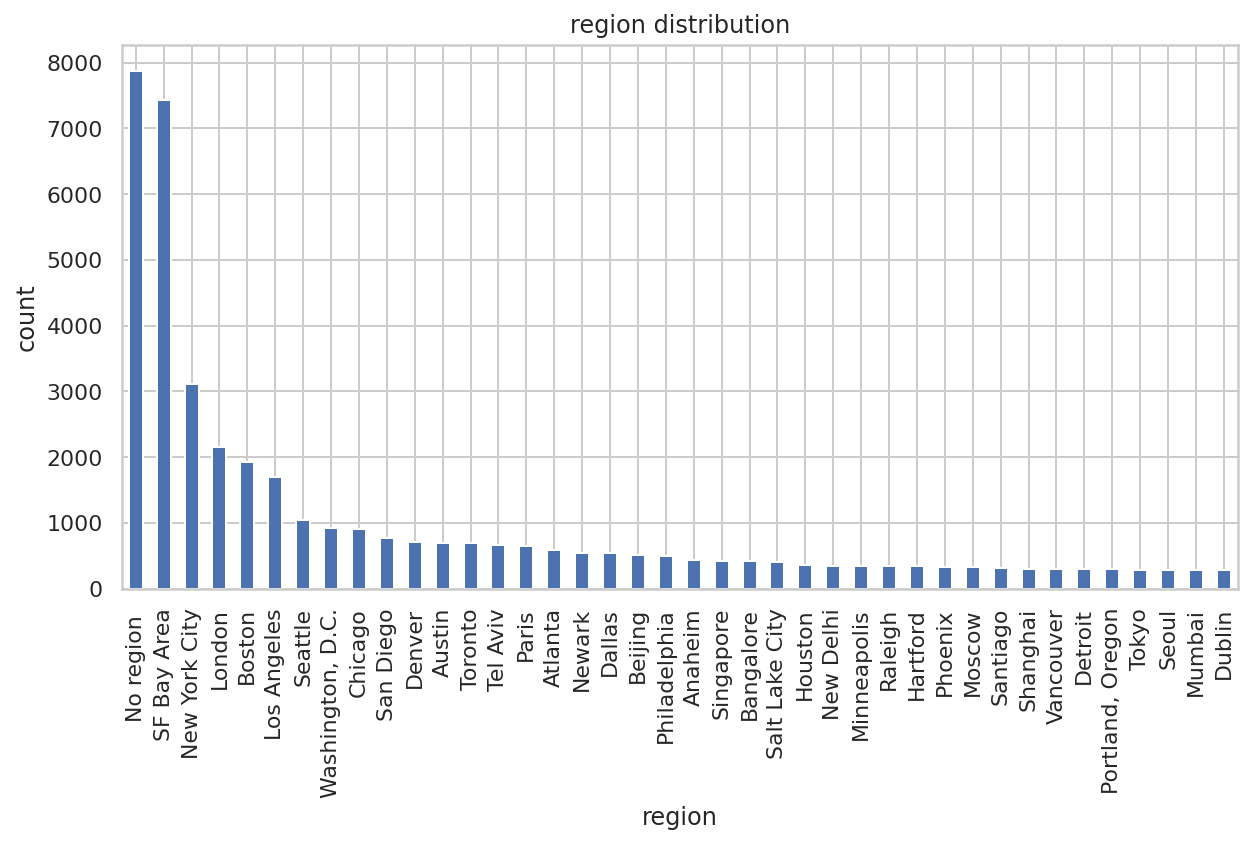

In [42]:
info.region.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("region distribution")
plt.ylabel('count')
plt.xlabel('region');

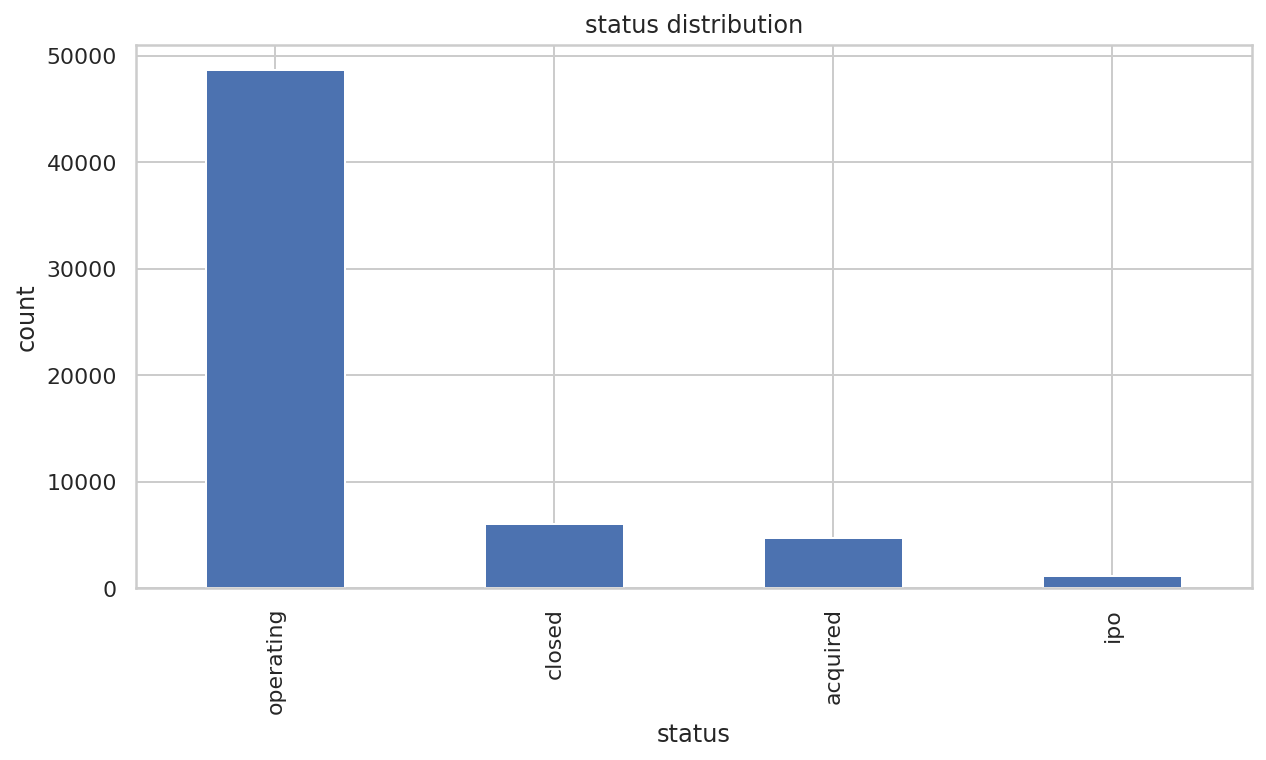

In [43]:
info.status.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("status distribution")
plt.ylabel('count')
plt.xlabel('status');

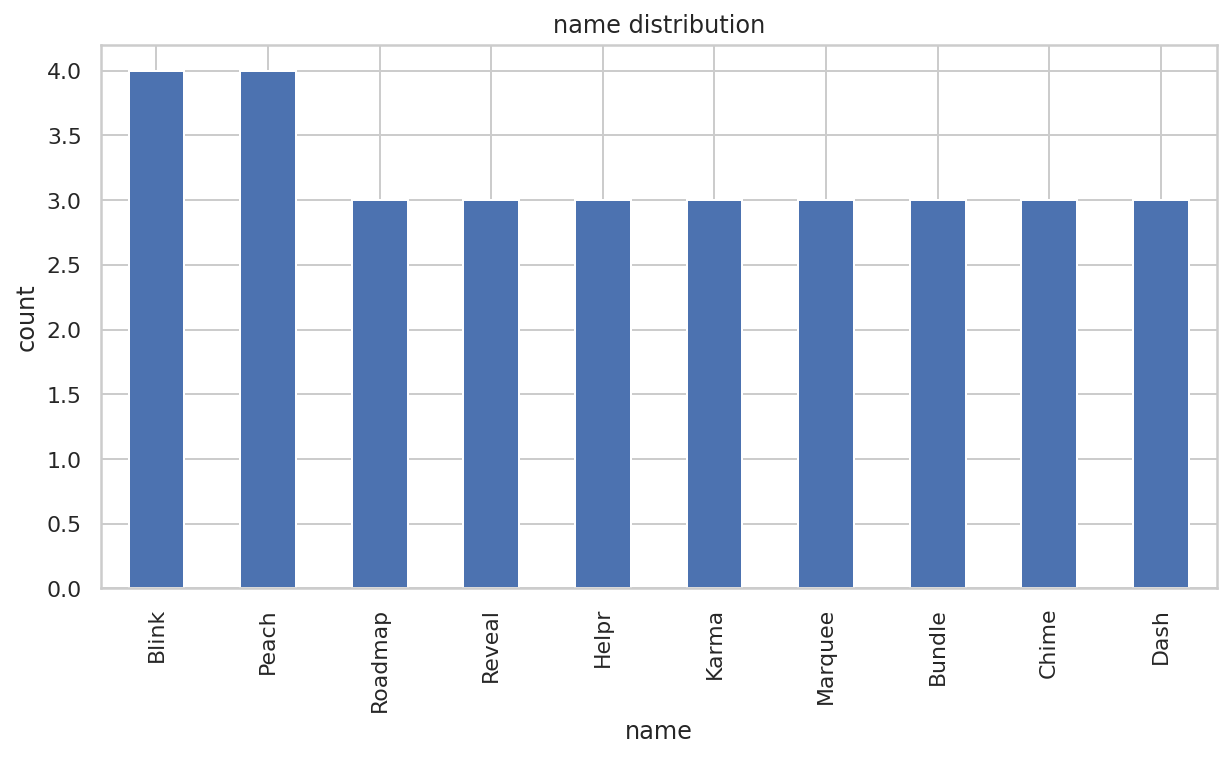

In [44]:
info.name.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("name distribution")
plt.ylabel('count')
plt.xlabel('name');

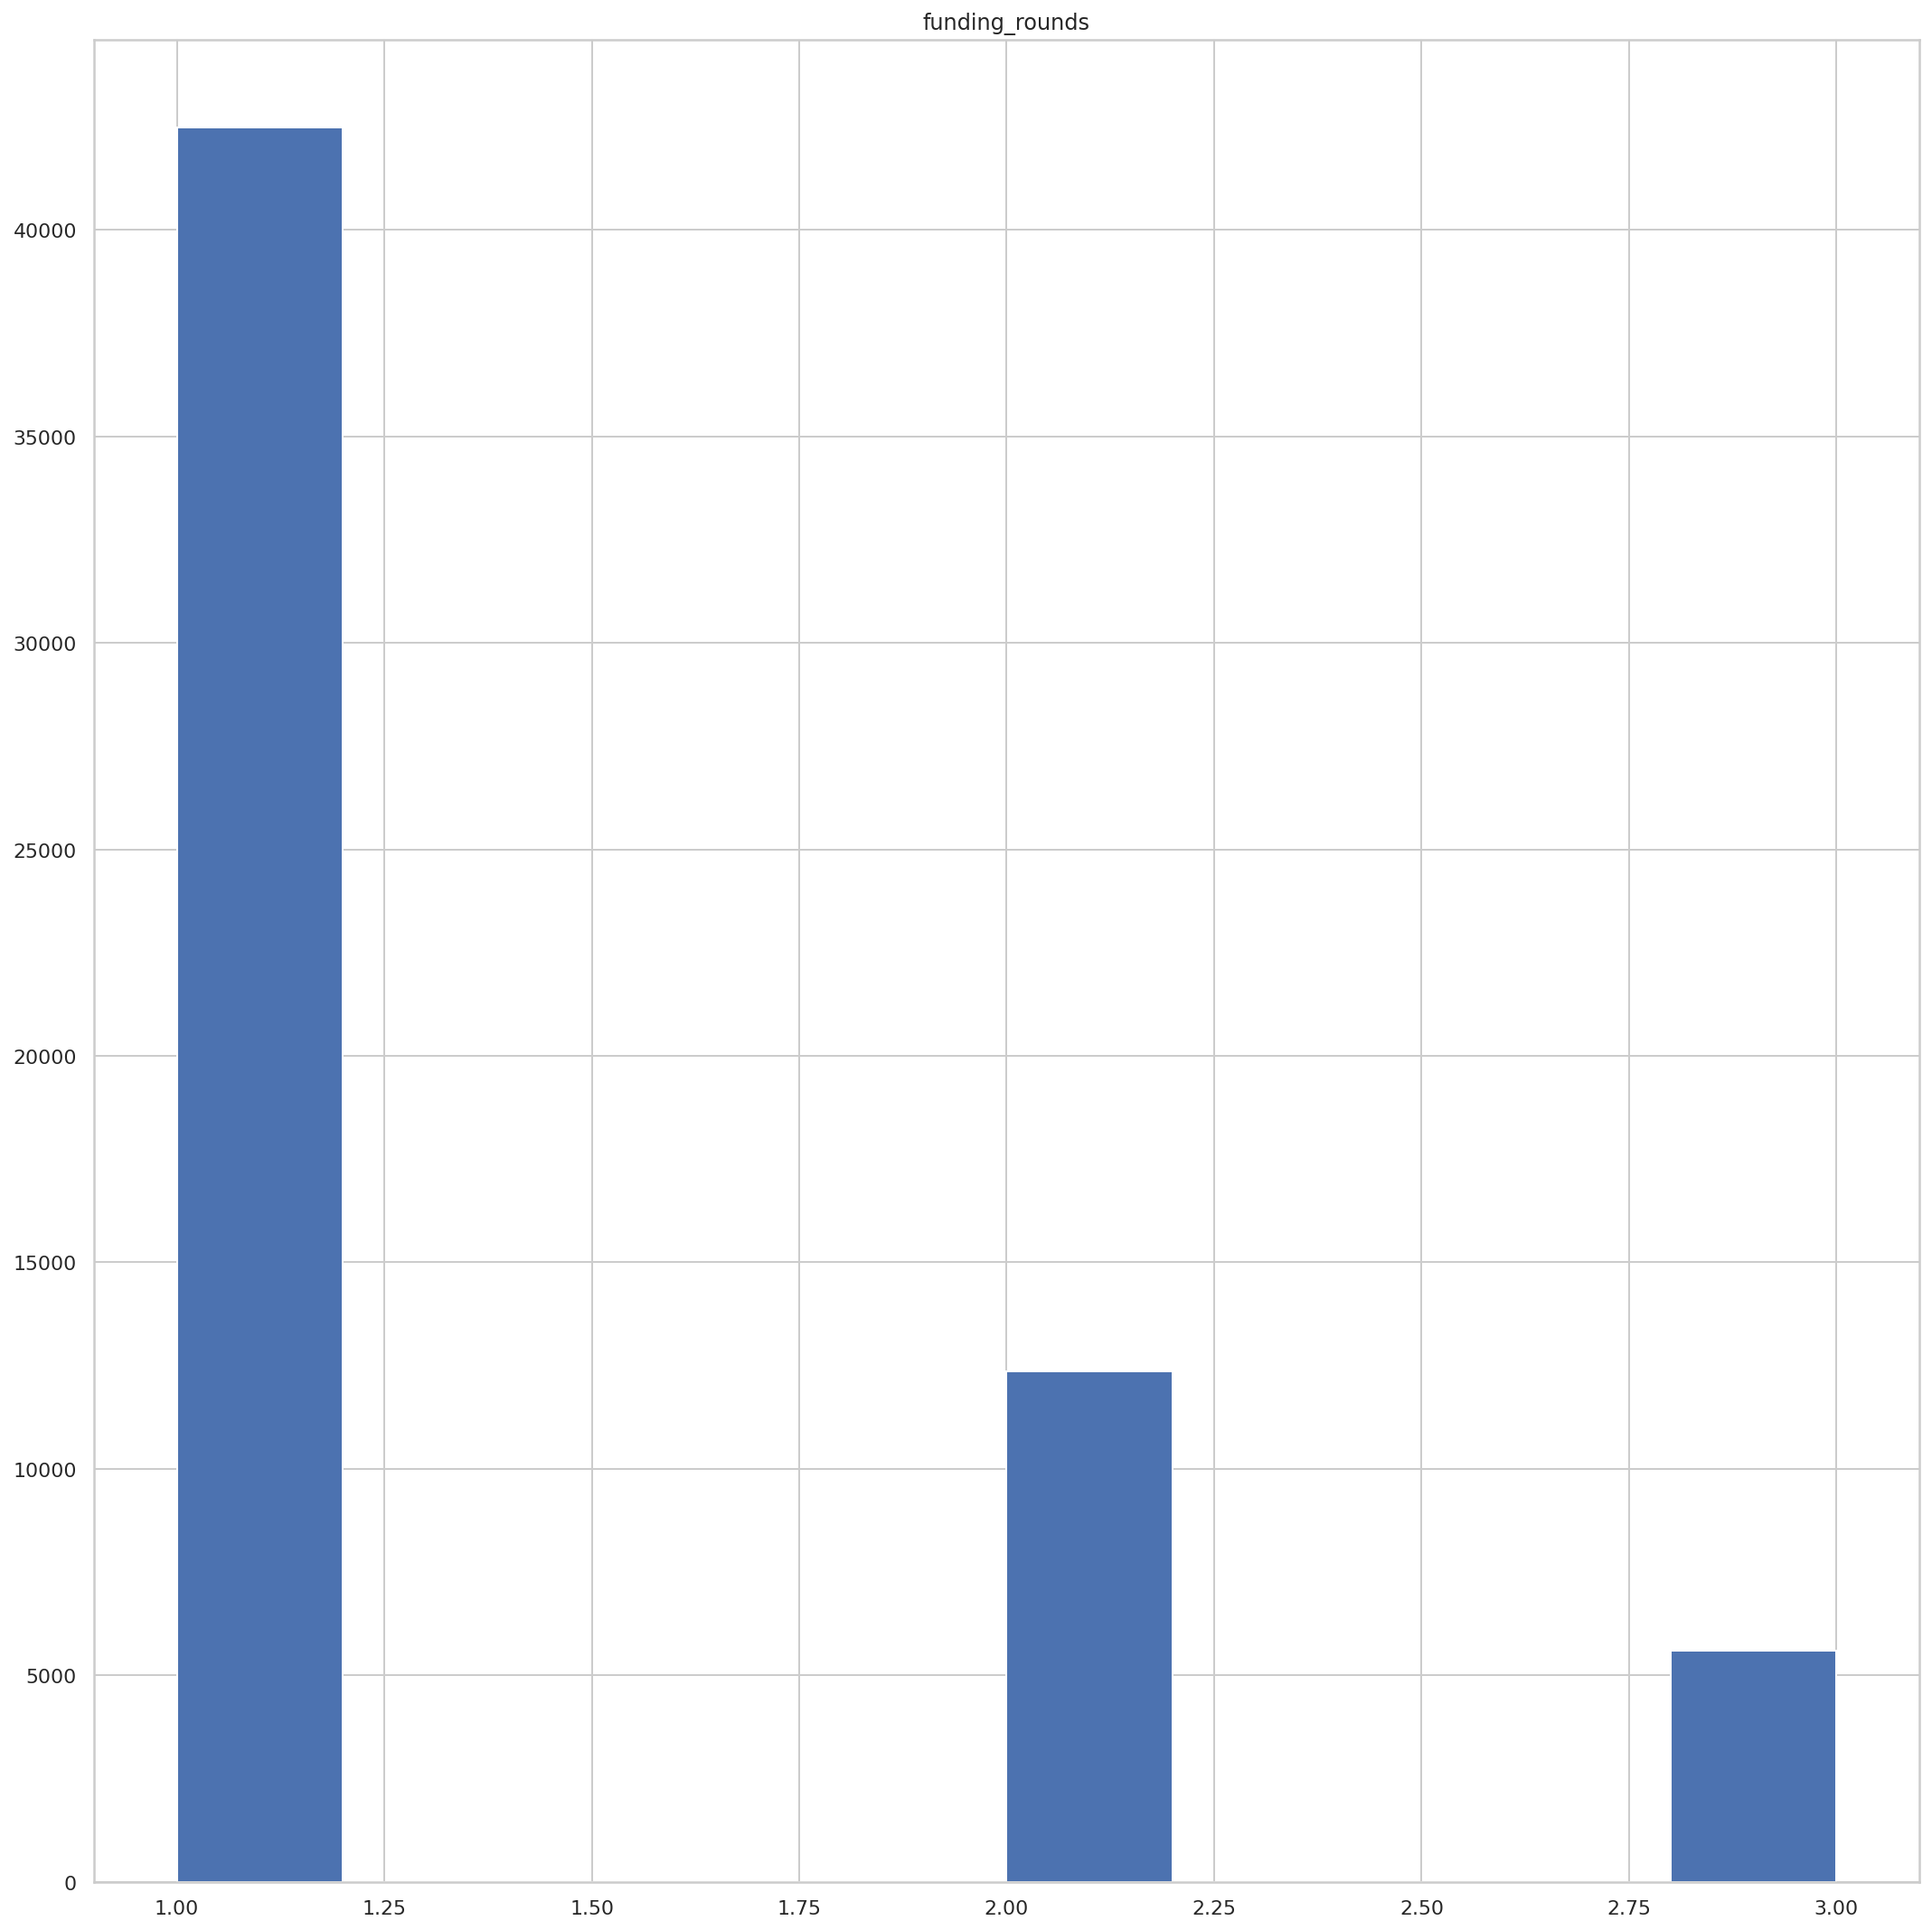

In [45]:
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(info,ax=ax)
plt.tight_layout();

In [46]:
#By creating a function in between x and y we can manipulate many columns
def diff_bar(x,y):
    
    info.groupby([x,y]).size().unstack(level=-1).plot(kind='bar',figsize=(15,15))
    plt.xlabel('x',fontsize = 10)
    plt.ylabel('count',fontsize = 10)
    plt.legend(loc=0,fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("Analyzing status column",fontsize = 10)
    plt.show()

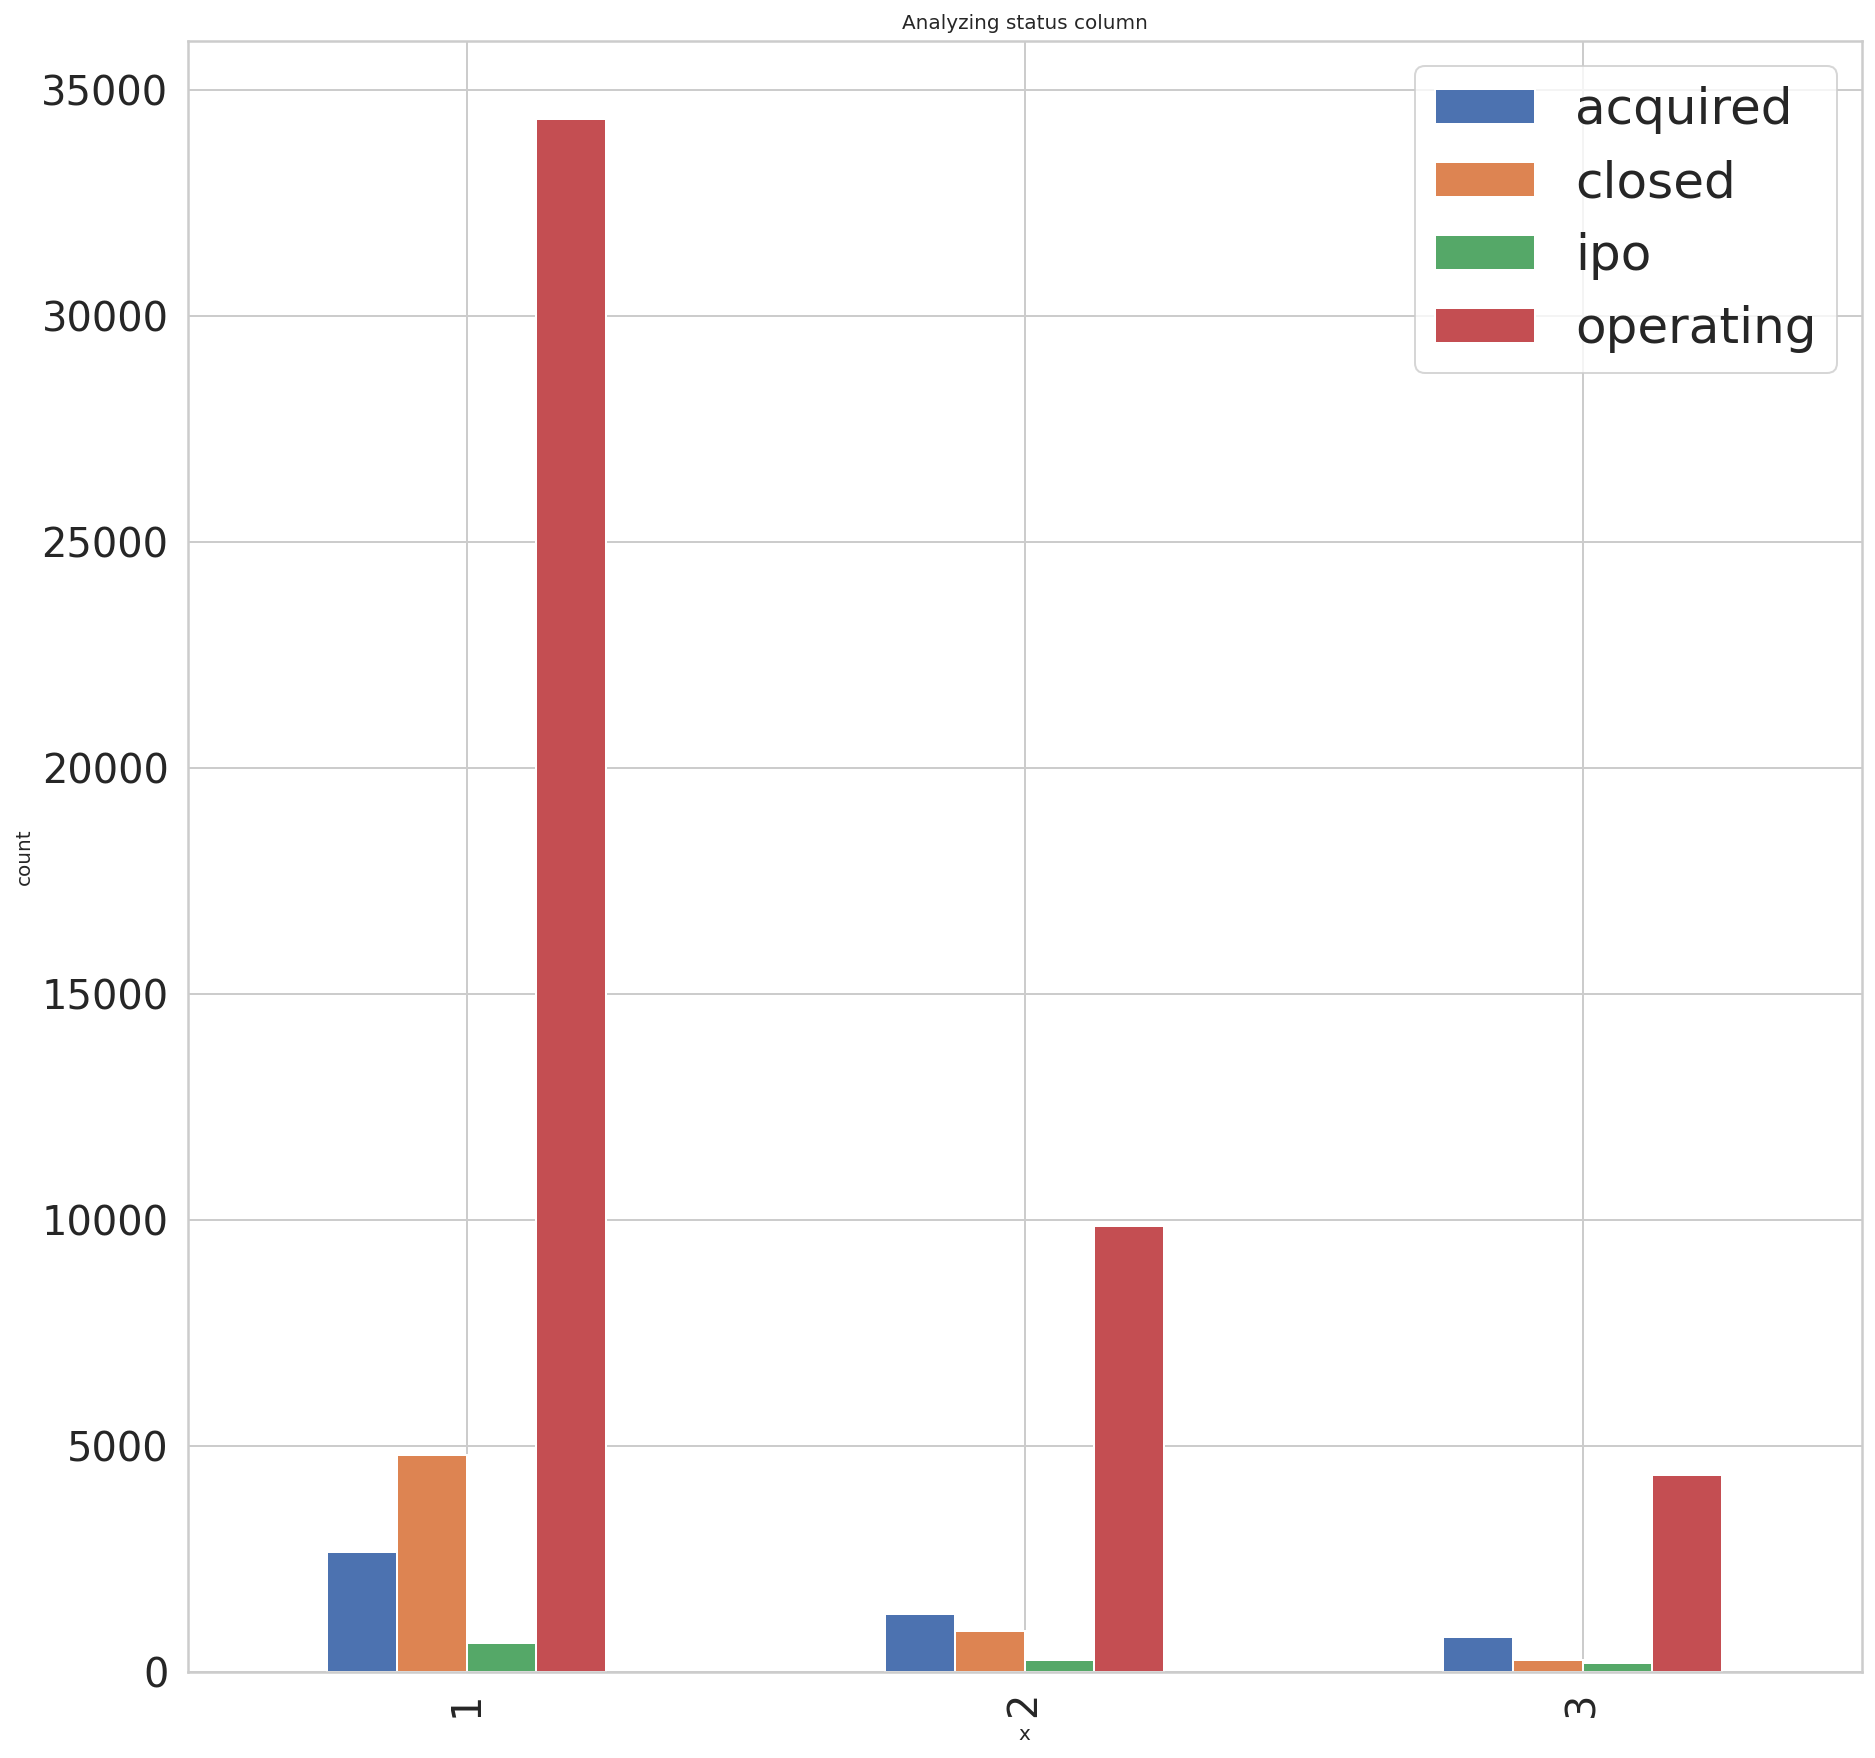

In [47]:
diff_bar('funding_rounds','status')

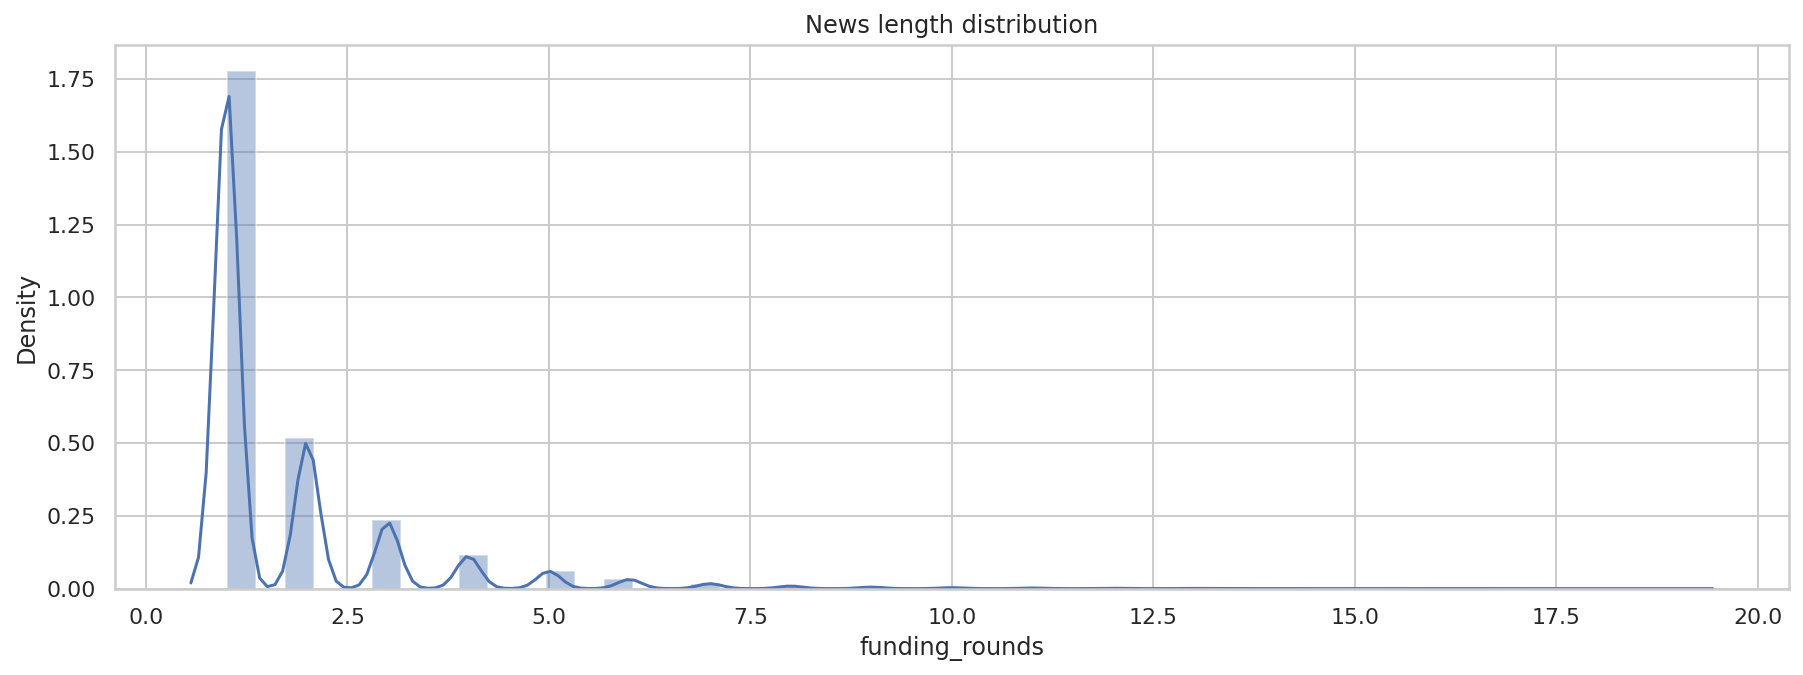

In [60]:
plt.figure(figsize=(15, 5))
sns.distplot(data['funding_rounds']).set_title('News length distribution');